# Simple Linear Regression

Analyze customer data for fictious ecommerce clothing company that is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [1]:
# All imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Get the Data

I'll be working with the ecommerce_customers.csv file from the (fictious) company. It contains customer info:

* Email address
* Postal address
* Avatar color 

Then it also has numerical value columns:

* Avg. Session Length: _Average session of in-store style advice sessions_
* Time on App: _Average time spent on app in minutes_
* Time on Website: _Average time spent on website in minutes_
* Length of Membership: _How many years the customer has been a member_

In [2]:
# Read in the ecommerce_customers.csv file as a DataFrame called customers
customers = pd.read_csv('ecommerce_customers.csv')

In [3]:
# Check the head of customers, inspect dataframe
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


# EDA

**Let's explore the data!**

Questions to consider:

* Which platform to customers spend more time on?
* Do the numerical correlations make sense? What two features are most correlated?
* Does more time on site/app equate to more money spent?
* **Do we focus on improving app experience or website experience?**

In [21]:
# Use .describe() to see basic numerical info
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


It appears more people spend time on the website rather than the app. Let's continue on to see if this will correlate with more money spent, but for now lets explore the correlation between these features.

In [6]:
# Set style
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

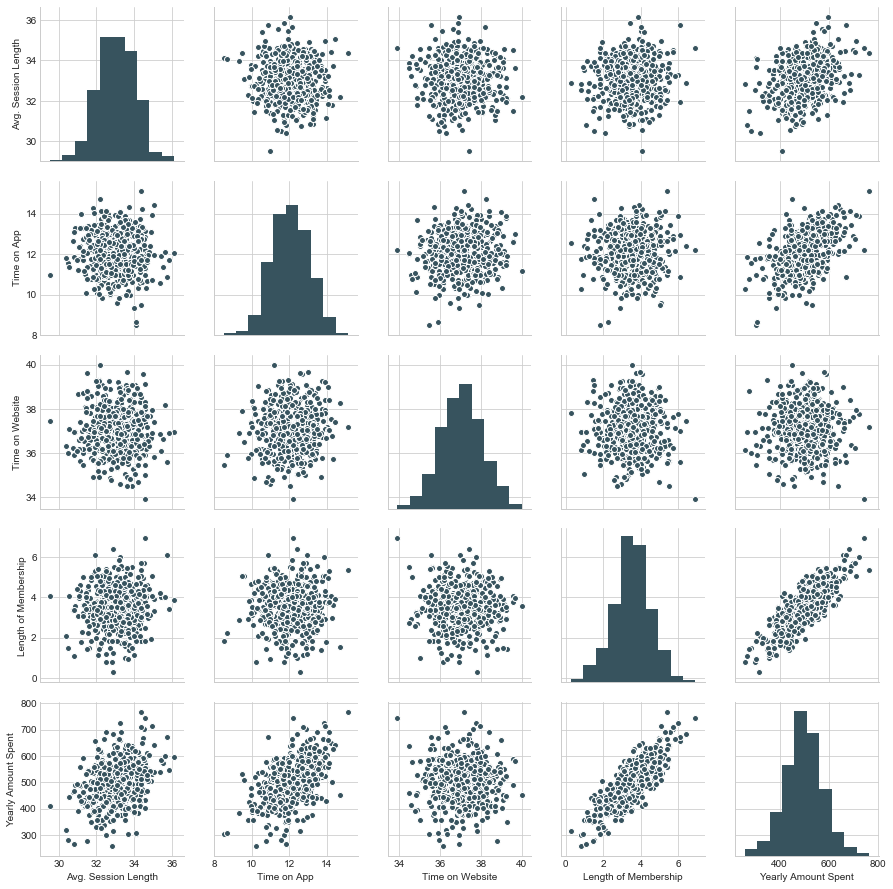

In [7]:
# Create pair plots and distributions of numerical features
sns.pairplot(customers)

From the pair plot it looks like Length of Membership and Yearly Amount Spent are the most correlated. To confirm this quantitatively, lets look at a heat map with the correlation coefficients

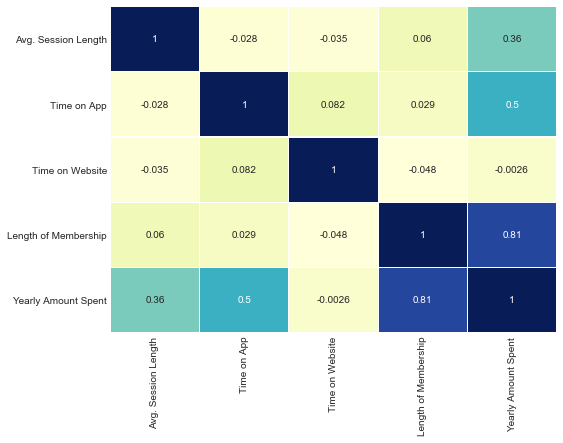

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(customers.corr(), annot=True, linewidths=0.2, cmap="YlGnBu", cbar=False)

From the heatmap containing correlation coefficients it is confirmed that Length of Membership and Yearly Amount Spent are the most correlated. Now let's create a linear model plot of Yearly Amount Spent vs. Length of Membership.

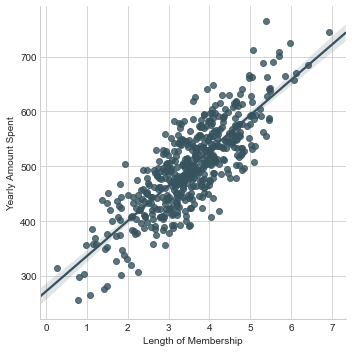

In [9]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

Let's take the analysis one step forward now and compare Time on app and Time on site to Yearly Amount spent using a jointplot.

/Users/schaefferda/Documents/VirtualEnvs/data_sci/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


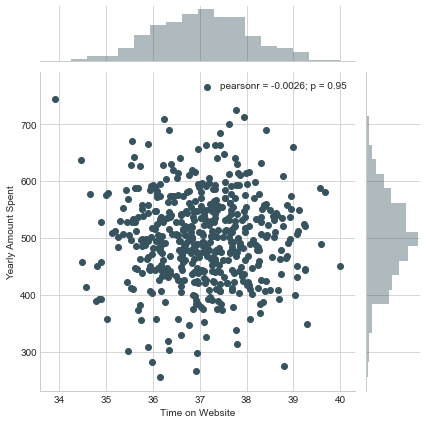

In [10]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

/Users/schaefferda/Documents/VirtualEnvs/data_sci/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


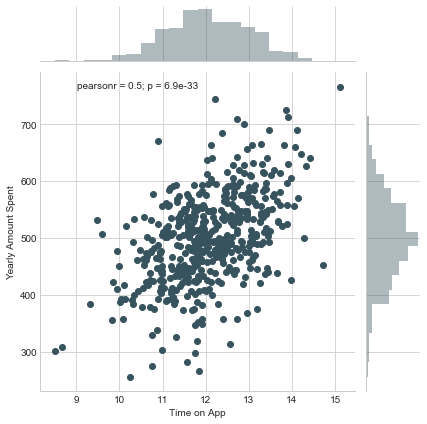

In [11]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

## Training and Testing

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
I'll be setting the variable X equal to the numerical features of the customers and the variable y equal to the "Yearly Amount Spent" column.

In [12]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [13]:
# Split the data into training and testing sets with test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression() # Create instance of LinearRegression model
lm.fit(X_train,y_train) # Train/fit data
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.70676165 38.57260842  0.62520092 61.71767604]


/Users/schaefferda/Documents/VirtualEnvs/data_sci/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


## Predicting the Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [14]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

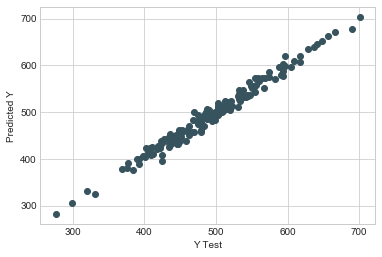

In [15]:
# Create scatter plot of real vs predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

We can see that the result is a linear fit implying that the model chosen predicts the outcome well.

## Evaluating the Model

Let's evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [16]:
print('MAE:', round(metrics.mean_absolute_error(y_test, predictions), 2))
print('MSE:', round(metrics.mean_squared_error(y_test, predictions),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

MAE: 8.35
MSE: 102.4
RMSE: 10.12


### Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

/Users/schaefferda/Documents/VirtualEnvs/data_sci/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


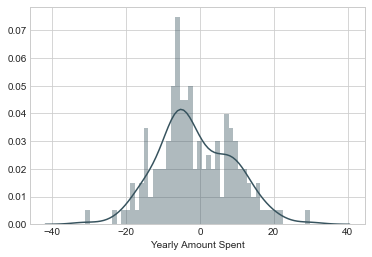

In [17]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
We still want to figure out the answer to the last question we posed in the beginning - do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [18]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.706762
Time on App,38.572608
Time on Website,0.625201
Length of Membership,61.717676


** How can we interpret these coefficients? **

Explanation of coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.71 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.57 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.63 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.71 total dollars spent**.

**Should the company focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company and requires more business domain expertise. To further this analysis we would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!
